<img src="https://upload.wikimedia.org/wikipedia/commons/d/df/Logo_UNIR.png" width="350" height="175">

# *TFM: Comparación y optimización de algoritmos de Machine Learning sobre el éxito de campañas de marketing bancarias*

Autor: ***Jorge López Pérez***

***

## ***1. Análisis exploratorio de datos (EDA)***

A lo largo de este cuaderno, realizaremos la exploración de nuestro conjunto de datos.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# leemos los datos
data = pd.read_csv('https://raw.githubusercontent.com/JorgeLopez88/TFM/main/data/raw_data.csv',sep=';')
data = data.replace('unknown', np.nan) #sustituimos los unknown por nan
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


***

#### 1.1 Resumen general

Contamos con 20 variables de entrada y 1 variable de salida. Según los autores estas son las descripciones de cada variable:

   **INPUTS VARIABLES:**
   
   BANK CLIENT DATA:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   RELATED WITH THE LAST CONTACT OF THE CURRENT CAMPAIGN:

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  OTHER ATTRIBUTES:

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

  SOCIAL AND ECONOMIC CONTEXT ATTRIBUTES:

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)    

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  **TARGET:**

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Empezemos viendo un vistazo general a nuestras variables: su tipo, el número de nulos por cada y sus valores únicos:

In [ ]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum

summary(data).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
age,int64,0,0.000000,78,41188
job,object,330,0.008012,11,40858
marital,object,80,0.001942,3,41108
education,object,1731,0.042027,7,39457
default,object,8597,0.208726,2,32591
housing,object,990,0.024036,2,40198
loan,object,990,0.024036,2,40198
contact,object,0,0.000000,2,41188
month,object,0,0.000000,10,41188
day_of_week,object,0,0.000000,5,41188


Vemos que tenemos datos nulos en 4 variables. Además, hay varias variables que son dicotómicas, es decir, sólo toman dos valores.

Separemos las variables en numéricas y categóricas:

In [3]:
numericas = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
categoricas_ordinal = ['education', 'month', 'day_of_week']

***

#### 1.2 Distribución de las variables categóricas

Continuamos con la distribución por clases de las variables categóricas:

In [ ]:
for variable in categoricas:
  print(data[variable].value_counts(normalize=True))

  print('')

job
admin.           0.255079
blue-collar      0.226492
technician       0.165035
services         0.097141
management       0.071565
retired          0.042097
entrepreneur     0.035636
self-employed    0.034779
housemaid        0.025944
unemployed       0.024818
student          0.021416
Name: proportion, dtype: float64

marital
married     0.606403
single      0.281405
divorced    0.112192
Name: proportion, dtype: float64

education
university.degree      0.308386
high.school            0.241149
basic.9y               0.153205
professional.course    0.132879
basic.4y               0.105837
basic.6y               0.058089
illiterate             0.000456
Name: proportion, dtype: float64

default
no     0.999908
yes    0.000092
Name: proportion, dtype: float64

housing
yes    0.536743
no     0.463257
Name: proportion, dtype: float64

loan
no     0.844569
yes    0.155431
Name: proportion, dtype: float64

contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64

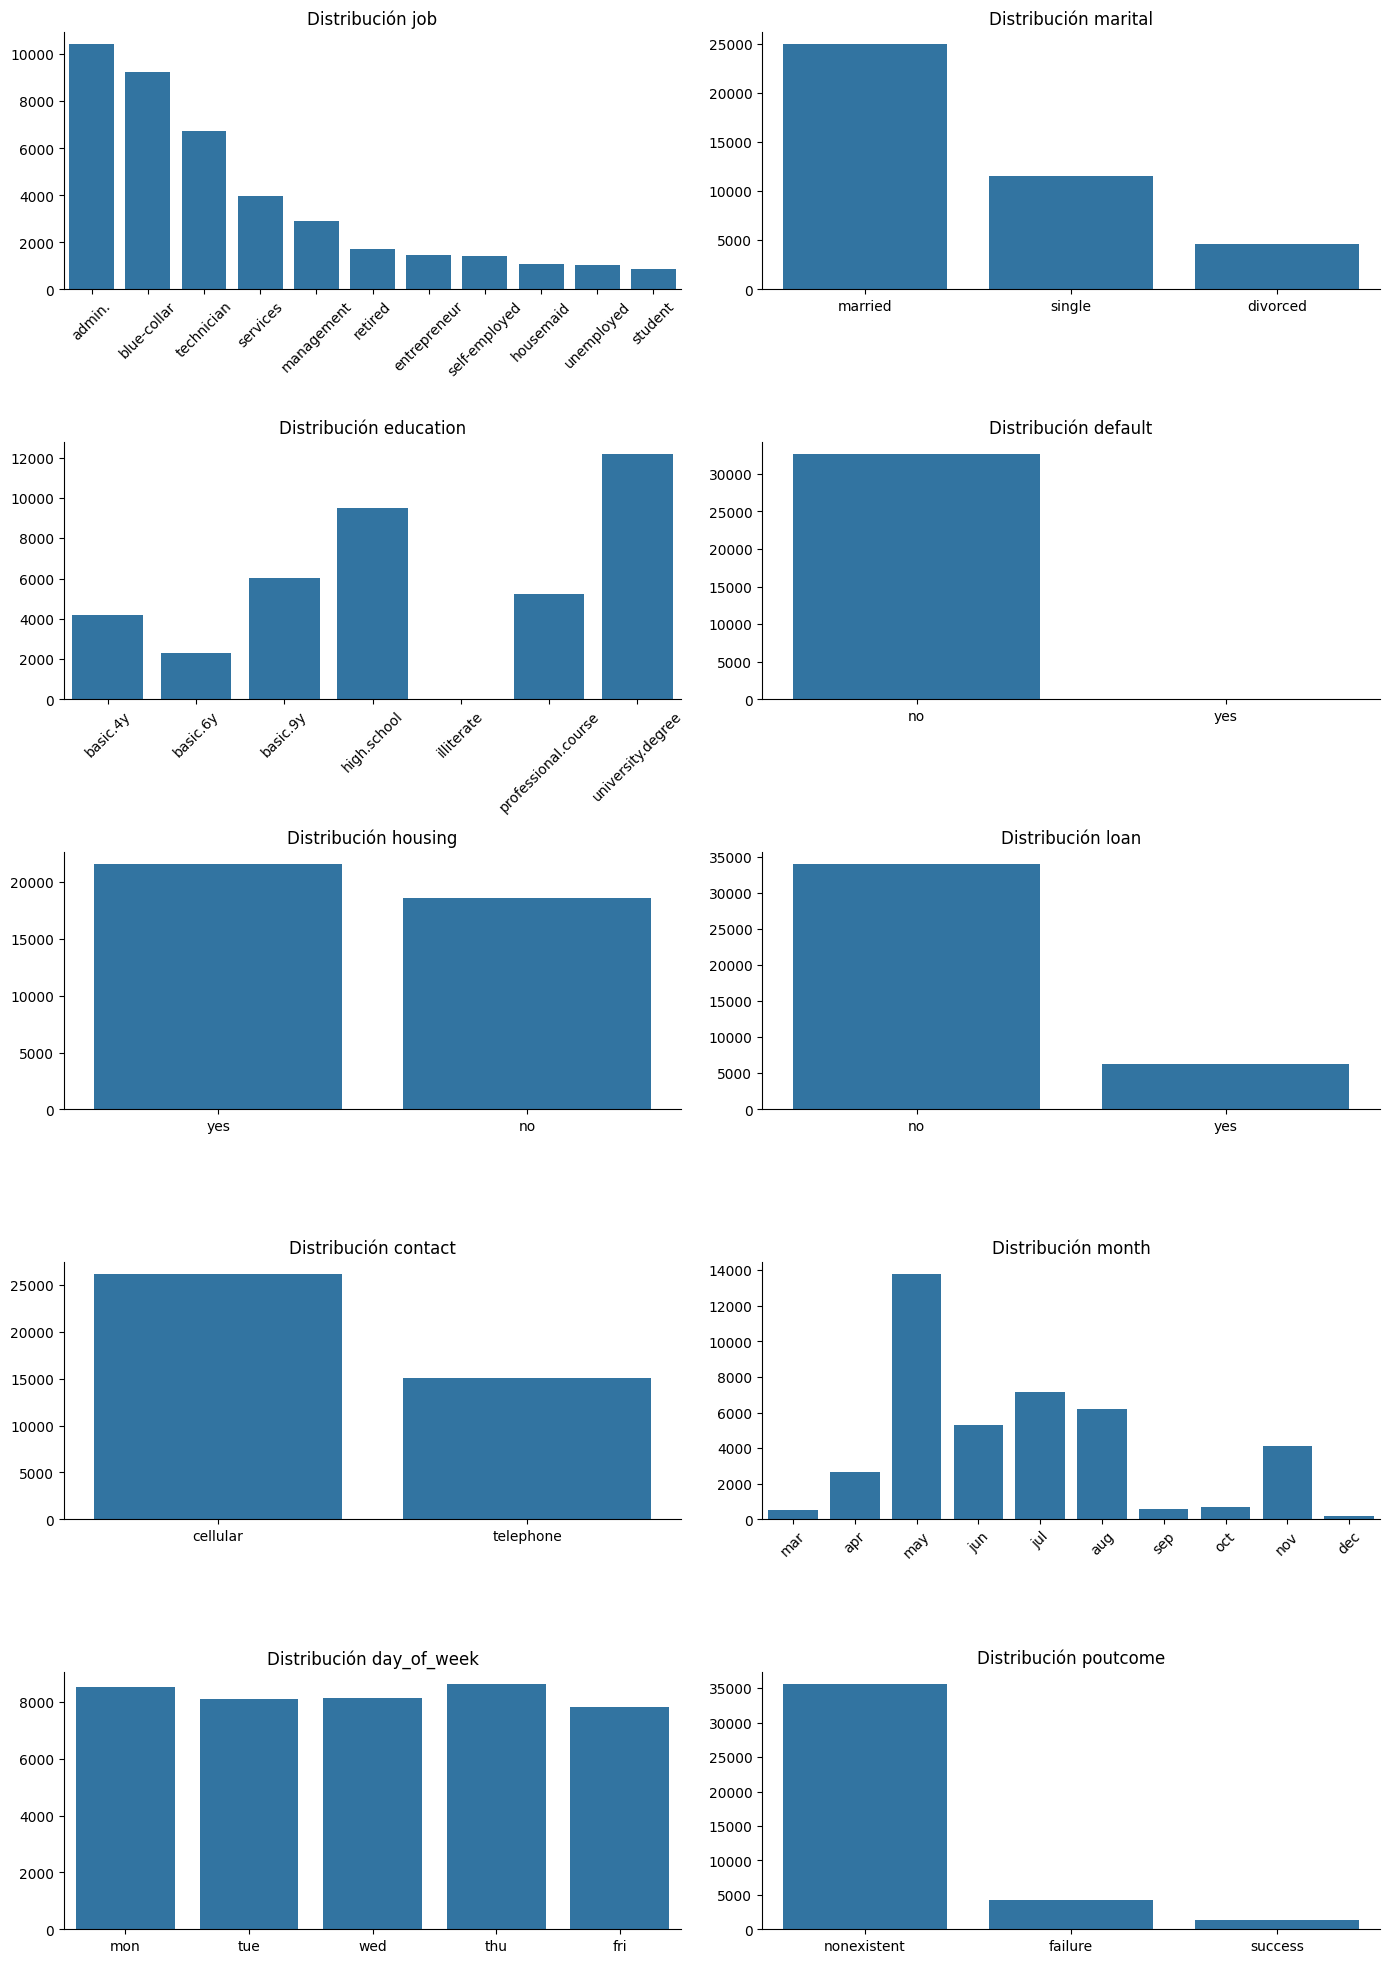

In [4]:
num_rows = len(categoricas)
num_cols = 2

total_plots = num_rows * num_cols
plt.figure(figsize=(14, num_rows * 4))

for idx, col in enumerate(categoricas):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    if col not in categoricas_ordinal: order = data[col].value_counts().index
    else:
      if col == 'education':  order = ["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree"]
      elif col == 'month': order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
      elif col == 'day_of_week': order = ['mon', 'tue', 'wed', 'thu', 'fri']

    sns.countplot(x=col, data=data, order=order)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=False, bottom=False, right=True, top=True)
    plt.title(f"Distribución {col}")
    if len(data[col].unique()) > 6:
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

***

#### 1.3 Distribución de las variables numéricas

In [ ]:
data[numericas].describe().drop('count').T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')

,mean,std,min,25%,50%,75%,max
age,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.000000
duration,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.000000
campaign,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.000000
pdays,962.475454,186.910907,0.000000,999.000000,999.000000,999.000000,999.000000
previous,0.172963,0.494901,0.000000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,0.081886,1.570960,-3.400000,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,93.575664,0.578840,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,-40.502600,4.628198,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,3.621291,1.734447,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,5167.035911,72.251528,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000


Boxplots y gráficas de densidad:

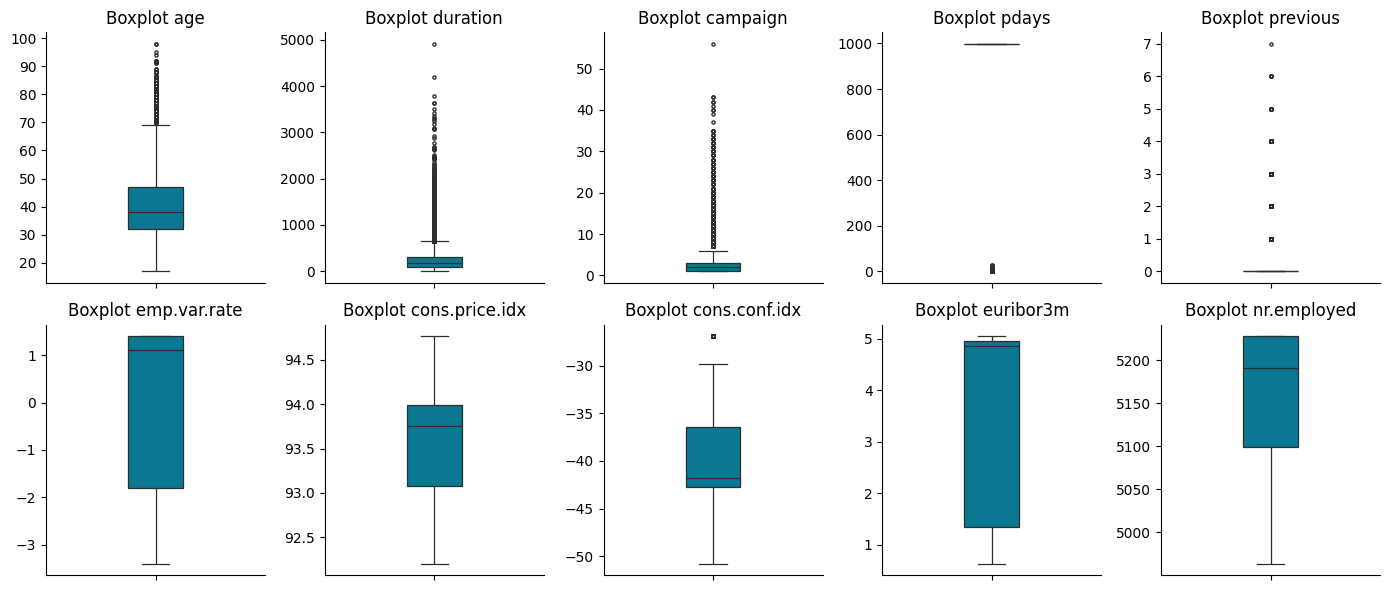

In [ ]:
num_rows = 2
num_cols = 5

total_plots = num_rows * num_cols
plt.figure(figsize=(14, num_rows * 3))

for idx, col in enumerate(numericas):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    sns.boxplot(y=col, data=data, width=0.25, saturation=0.90, linewidth=0.90, fliersize=2.25, color='#037d97')
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=False, bottom=False, right=True, top=True)
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

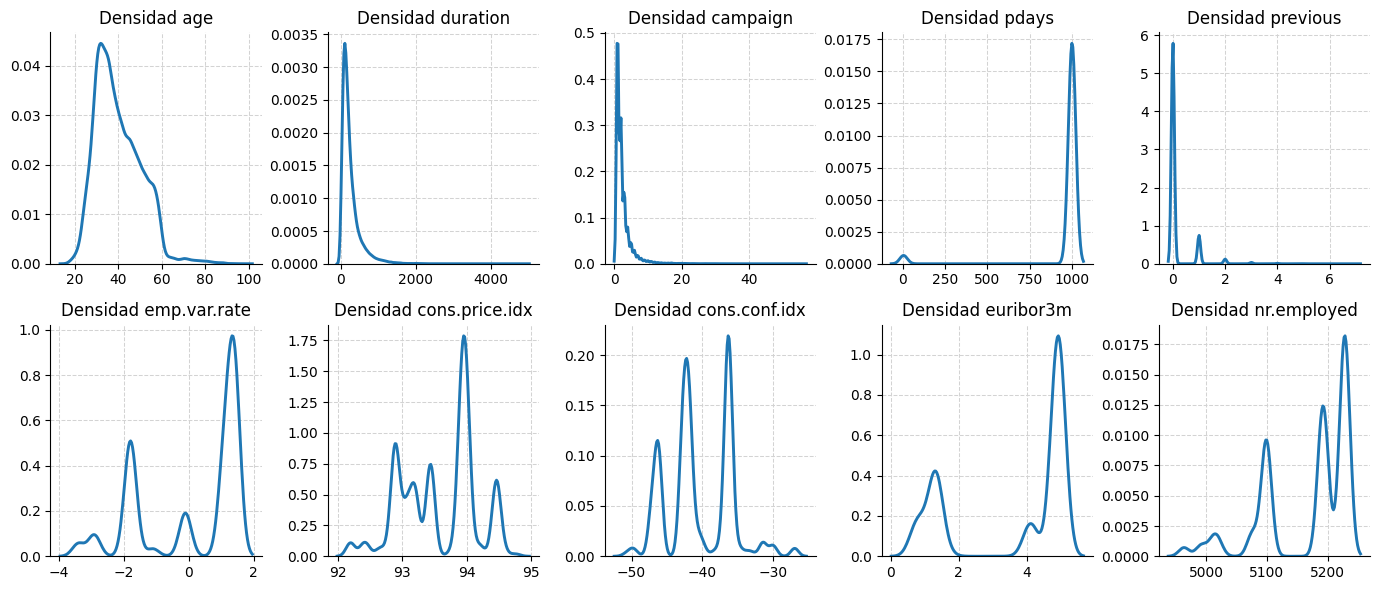

In [ ]:
num_rows = 2
num_cols = 5

total_plots = num_rows * num_cols
plt.figure(figsize=(14, num_rows * 3))

for idx, col in enumerate(numericas):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    sns.kdeplot(data=data[col],linewidth=2.1)
    plt.grid(visible=True, which='both', linestyle='--', color='lightgrey', linewidth=0.75)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=False, bottom=False, right=True, top=True)
    plt.title(f"Densidad {col}")

plt.tight_layout()
plt.show()

***

#### 1.4 Distribución del target

Empezaremos viendo la distribución de nuestra variable objetivo:

In [ ]:
data['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

(36.548 instancias negativas (88.73%) y 4640 positivas (11.27%))

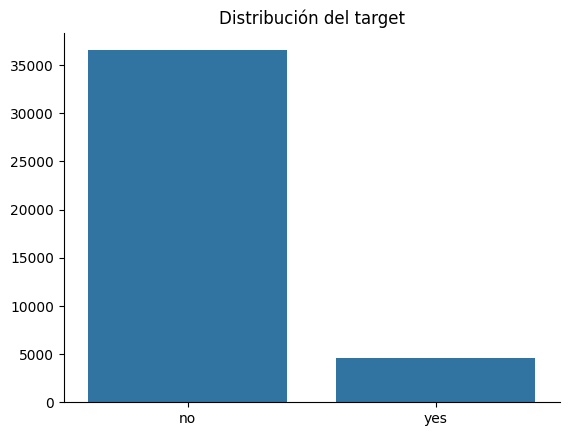

In [ ]:
sns.countplot(x=data['y'])
plt.xlabel('')
plt.ylabel('')
plt.title('Distribución del target')
sns.despine(left=False, bottom=False, right=True, top=True)
plt.show()

Análisis variables numéricas - target:

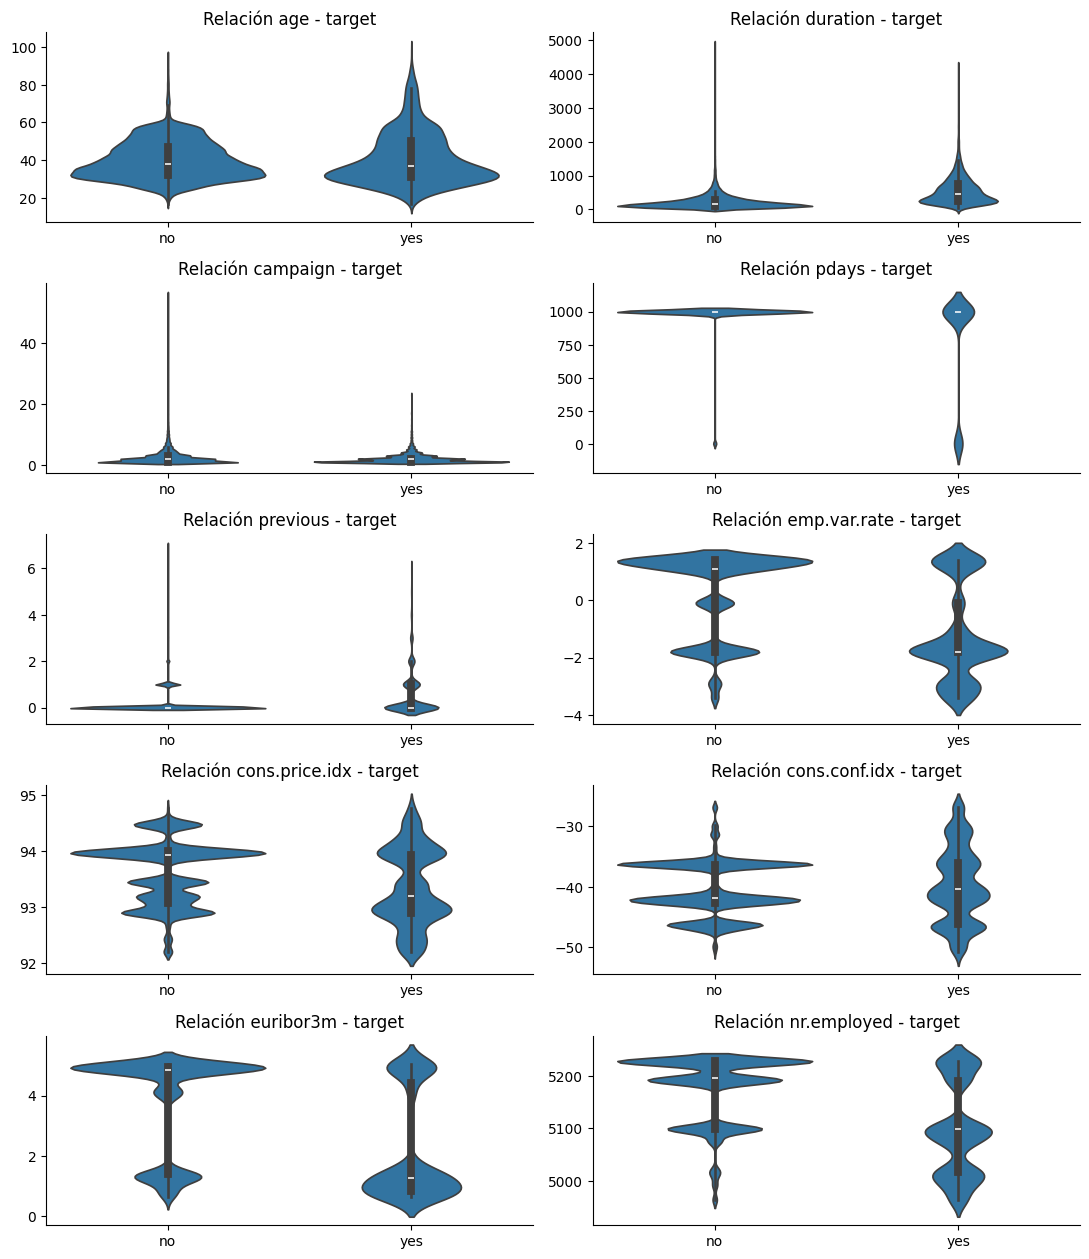

In [ ]:
num_rows = len(numericas)
num_cols = 2

total_plots = num_rows * num_cols
plt.figure(figsize=(11, num_rows * 2.5))

for idx, col in enumerate(numericas):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    sns.violinplot(x='y', y=col, data=data)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=False, bottom=False, right=True, top=True)
    plt.title(f"Relación {col} - target")

plt.tight_layout()
plt.show()

Análisis variables categóricas - target:

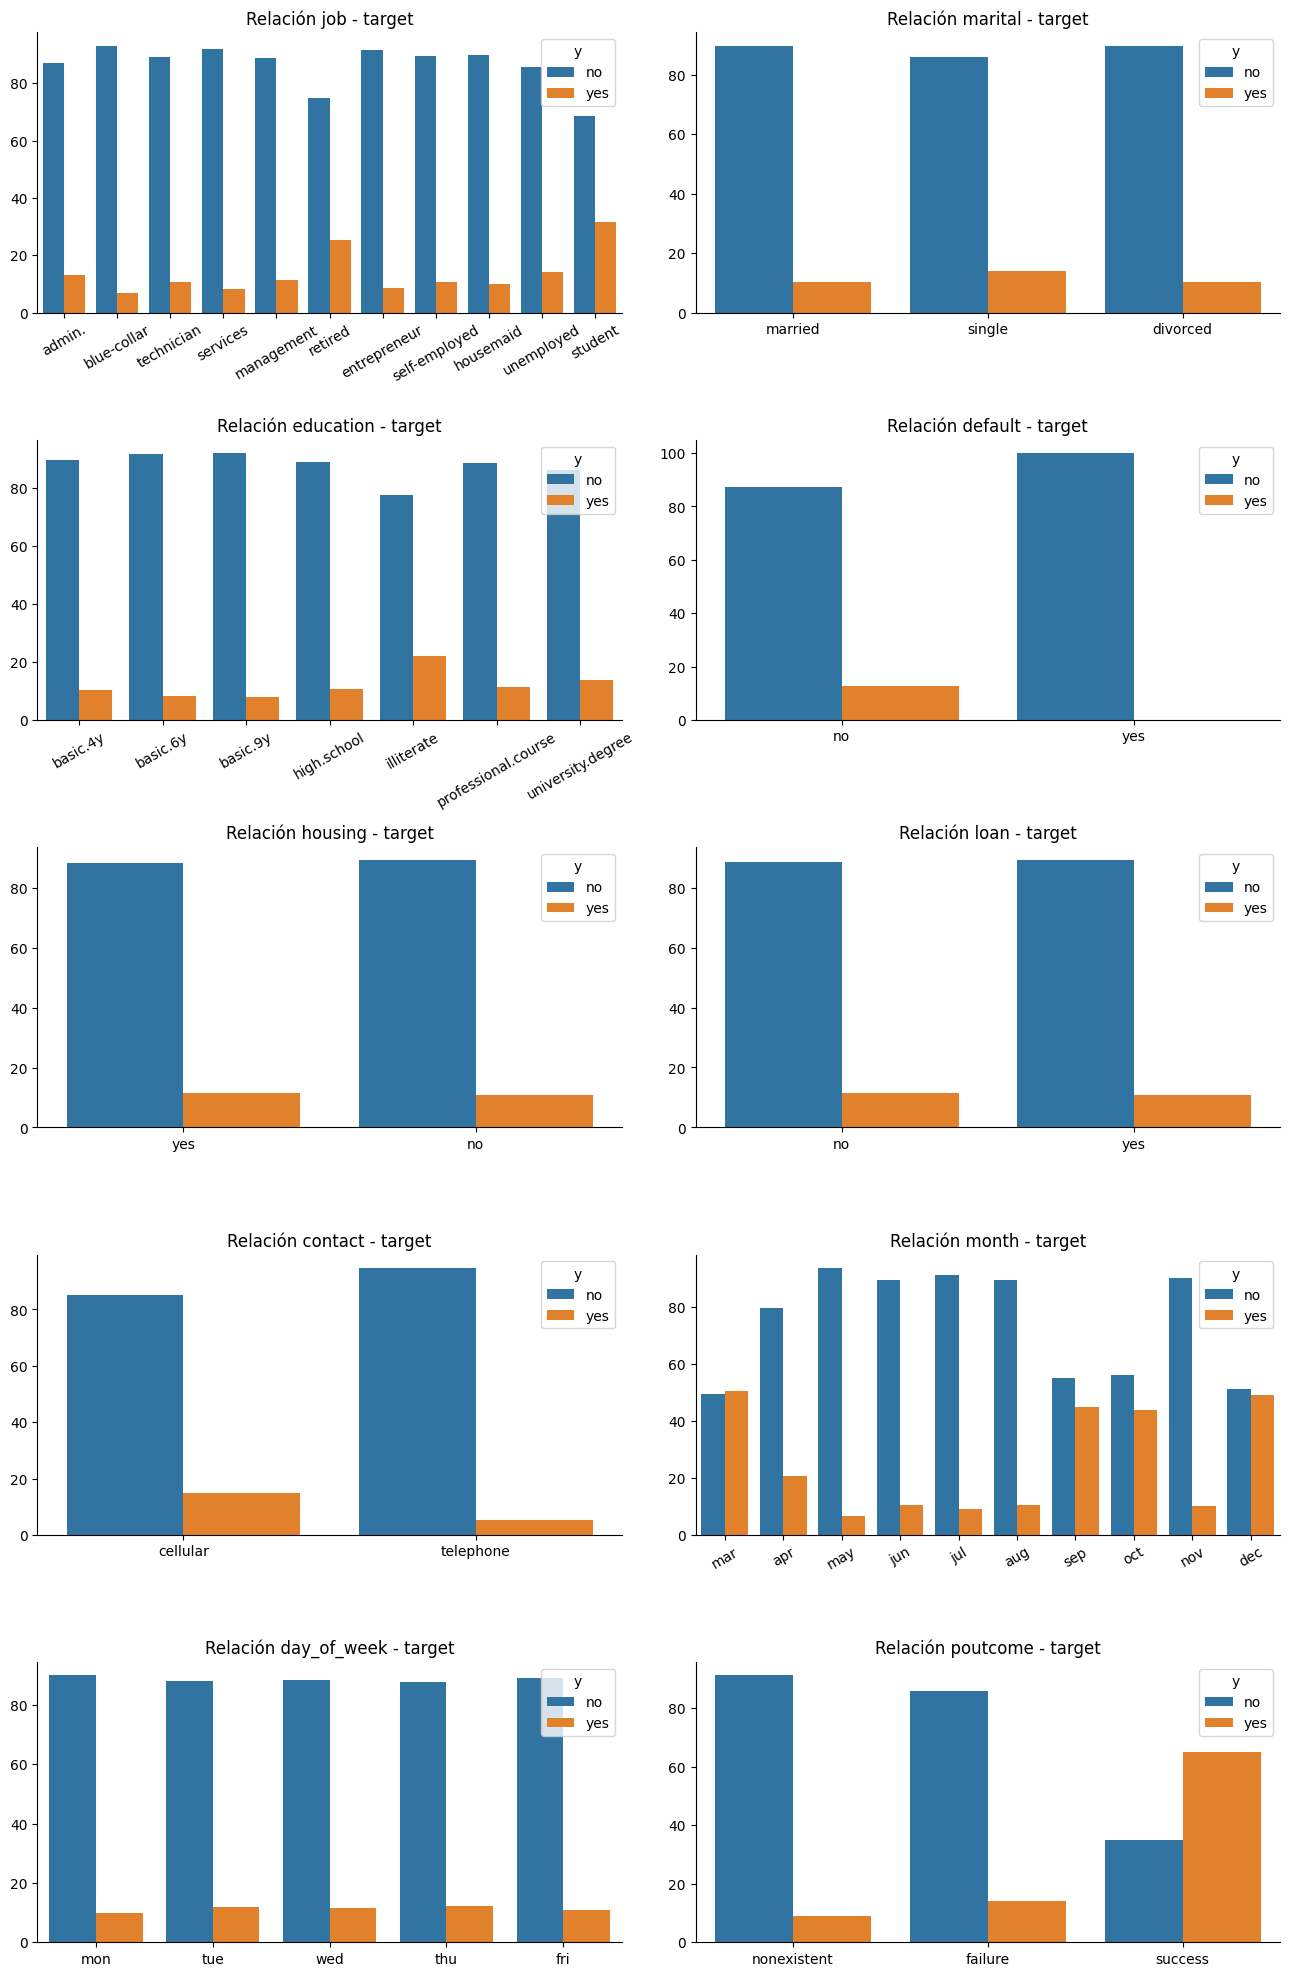

In [5]:
num_rows = len(categoricas)
num_cols = 2

total_plots = num_rows * num_cols
plt.figure(figsize=(13, num_rows * 4))

for idx, col in enumerate(categoricas):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    if col not in categoricas_ordinal: order = data[col].value_counts().index
    else:
      if col == 'education':  order = ["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree"]
      elif col == 'month': order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
      elif col == 'day_of_week': order = ['mon', 'tue', 'wed', 'thu', 'fri']

    percentages = data.groupby(col)['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(x=col, y='percent', hue='y', data=percentages, order=order)

    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=False, bottom=False, right=True, top=True)
    plt.title(f"Relación {col} - target")
    if len(data[col].unique()) > 6:
        plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

***

#### 1.5 Correlaciones

Finalizamos con la matriz de correlación de nuestras variables numéricas

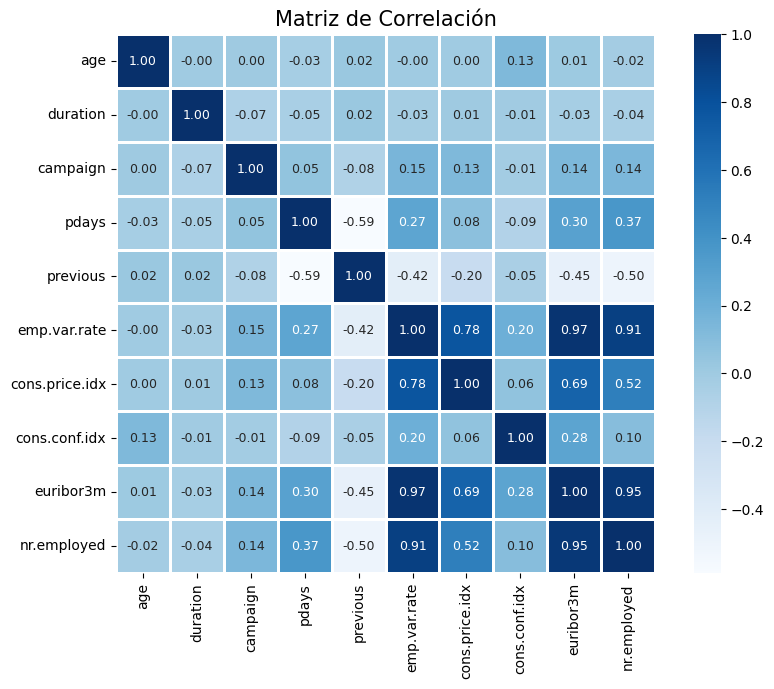

In [ ]:
corr_matrix = data[numericas].corr(method='pearson')

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Matriz de Correlación', fontsize=15)
plt.show()

Graficamos las variables mas correlacionadas:

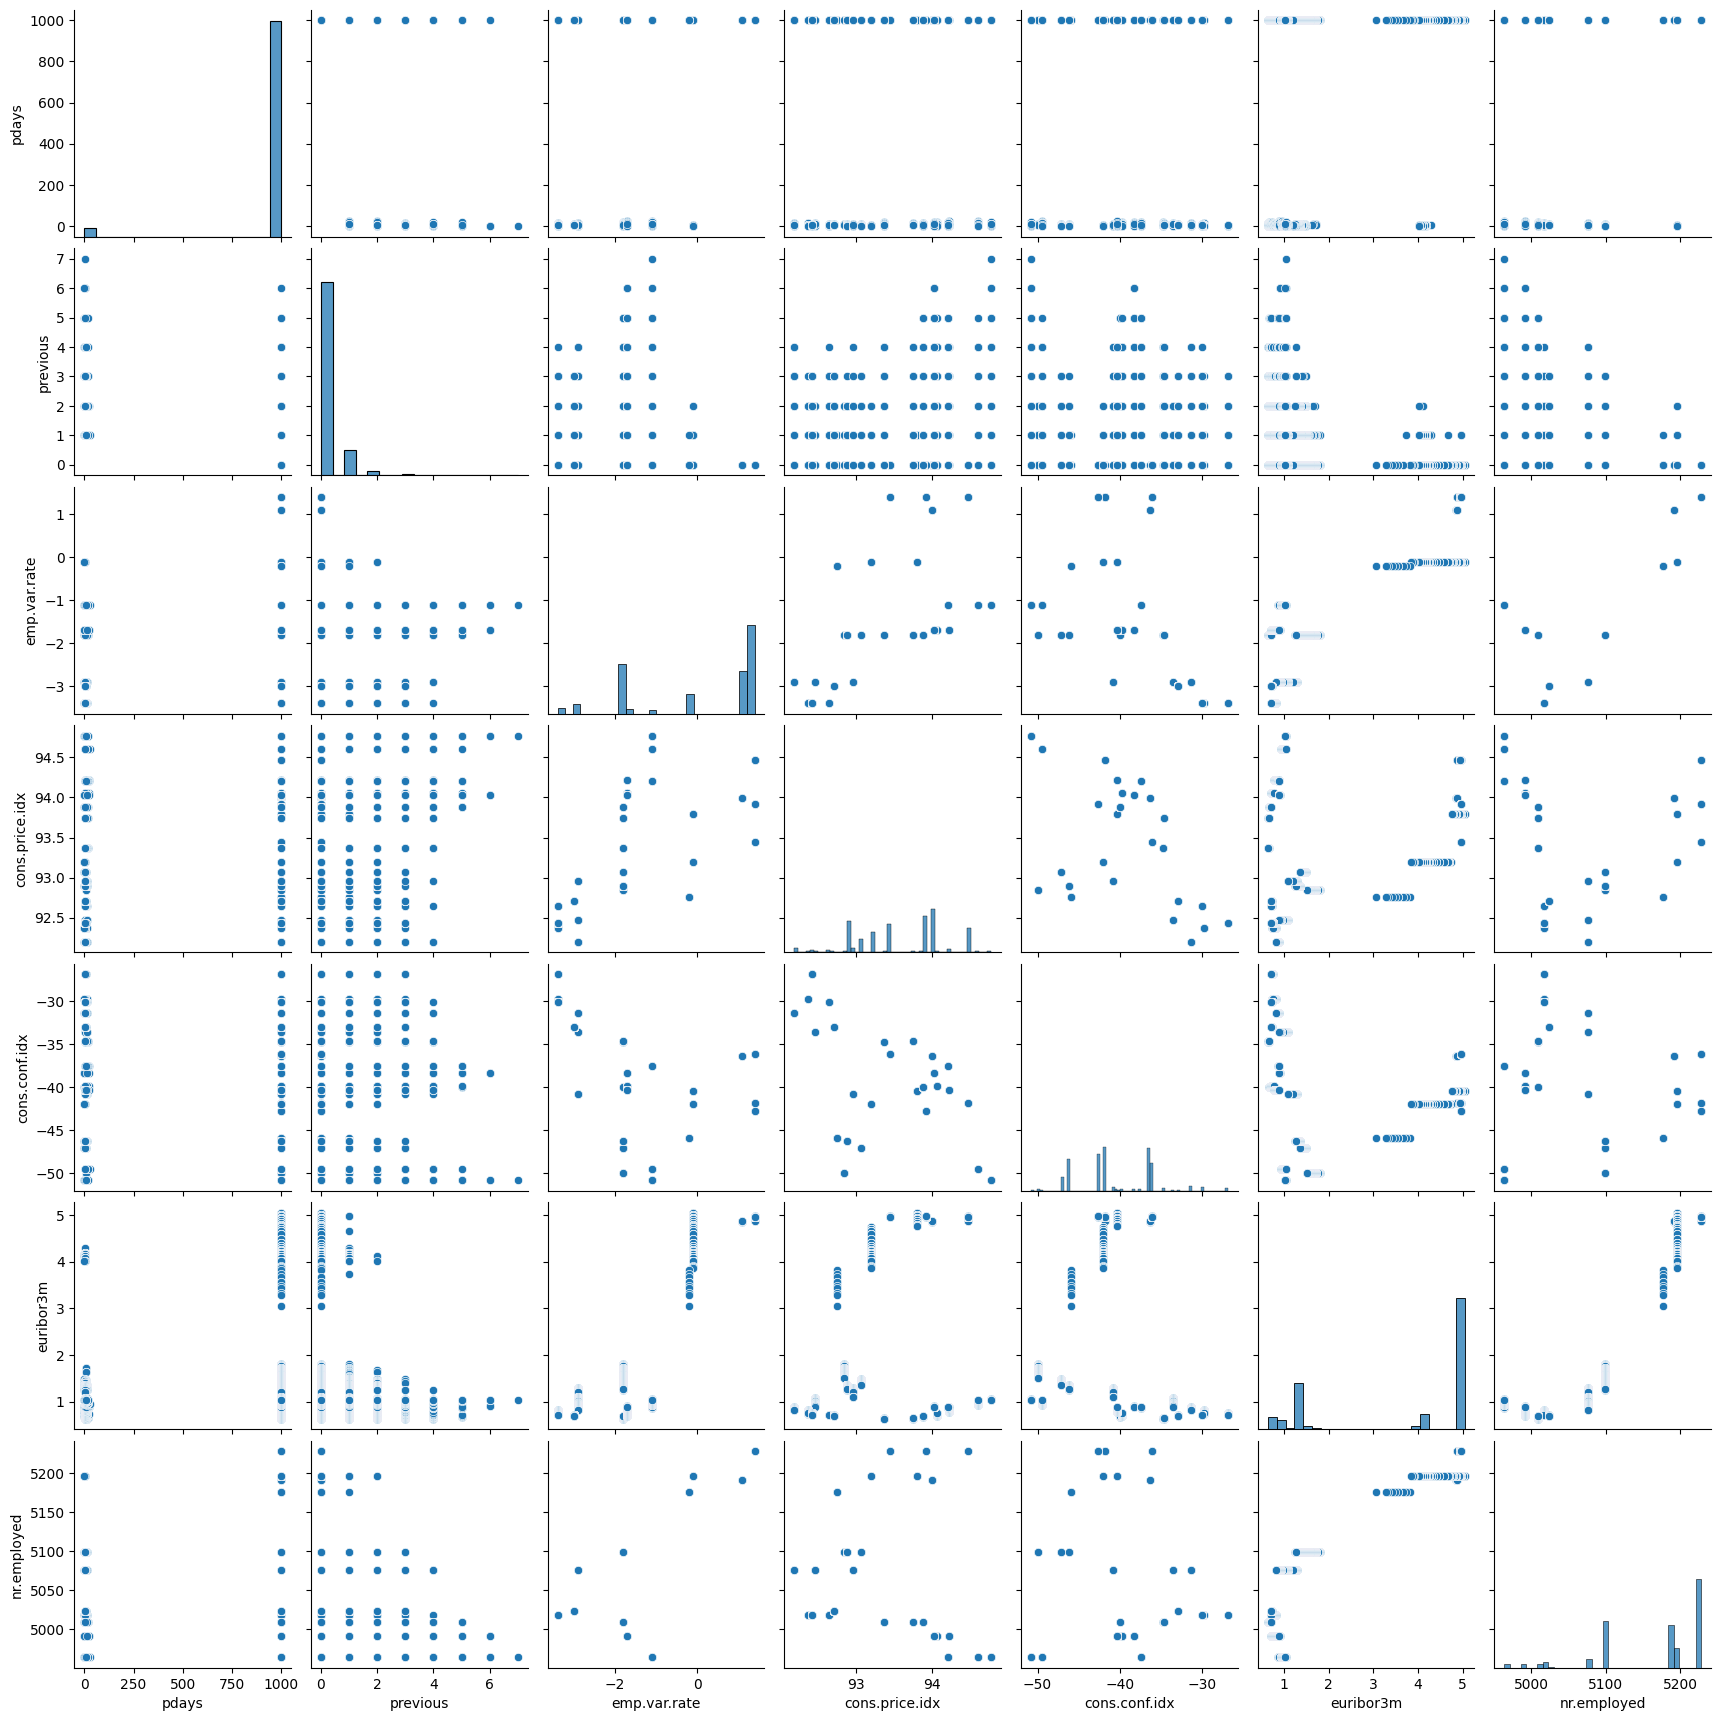

In [ ]:
correlaciones = ['pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
sns.pairplot(data[correlaciones])

Involucramos la clase a la que pertencen:

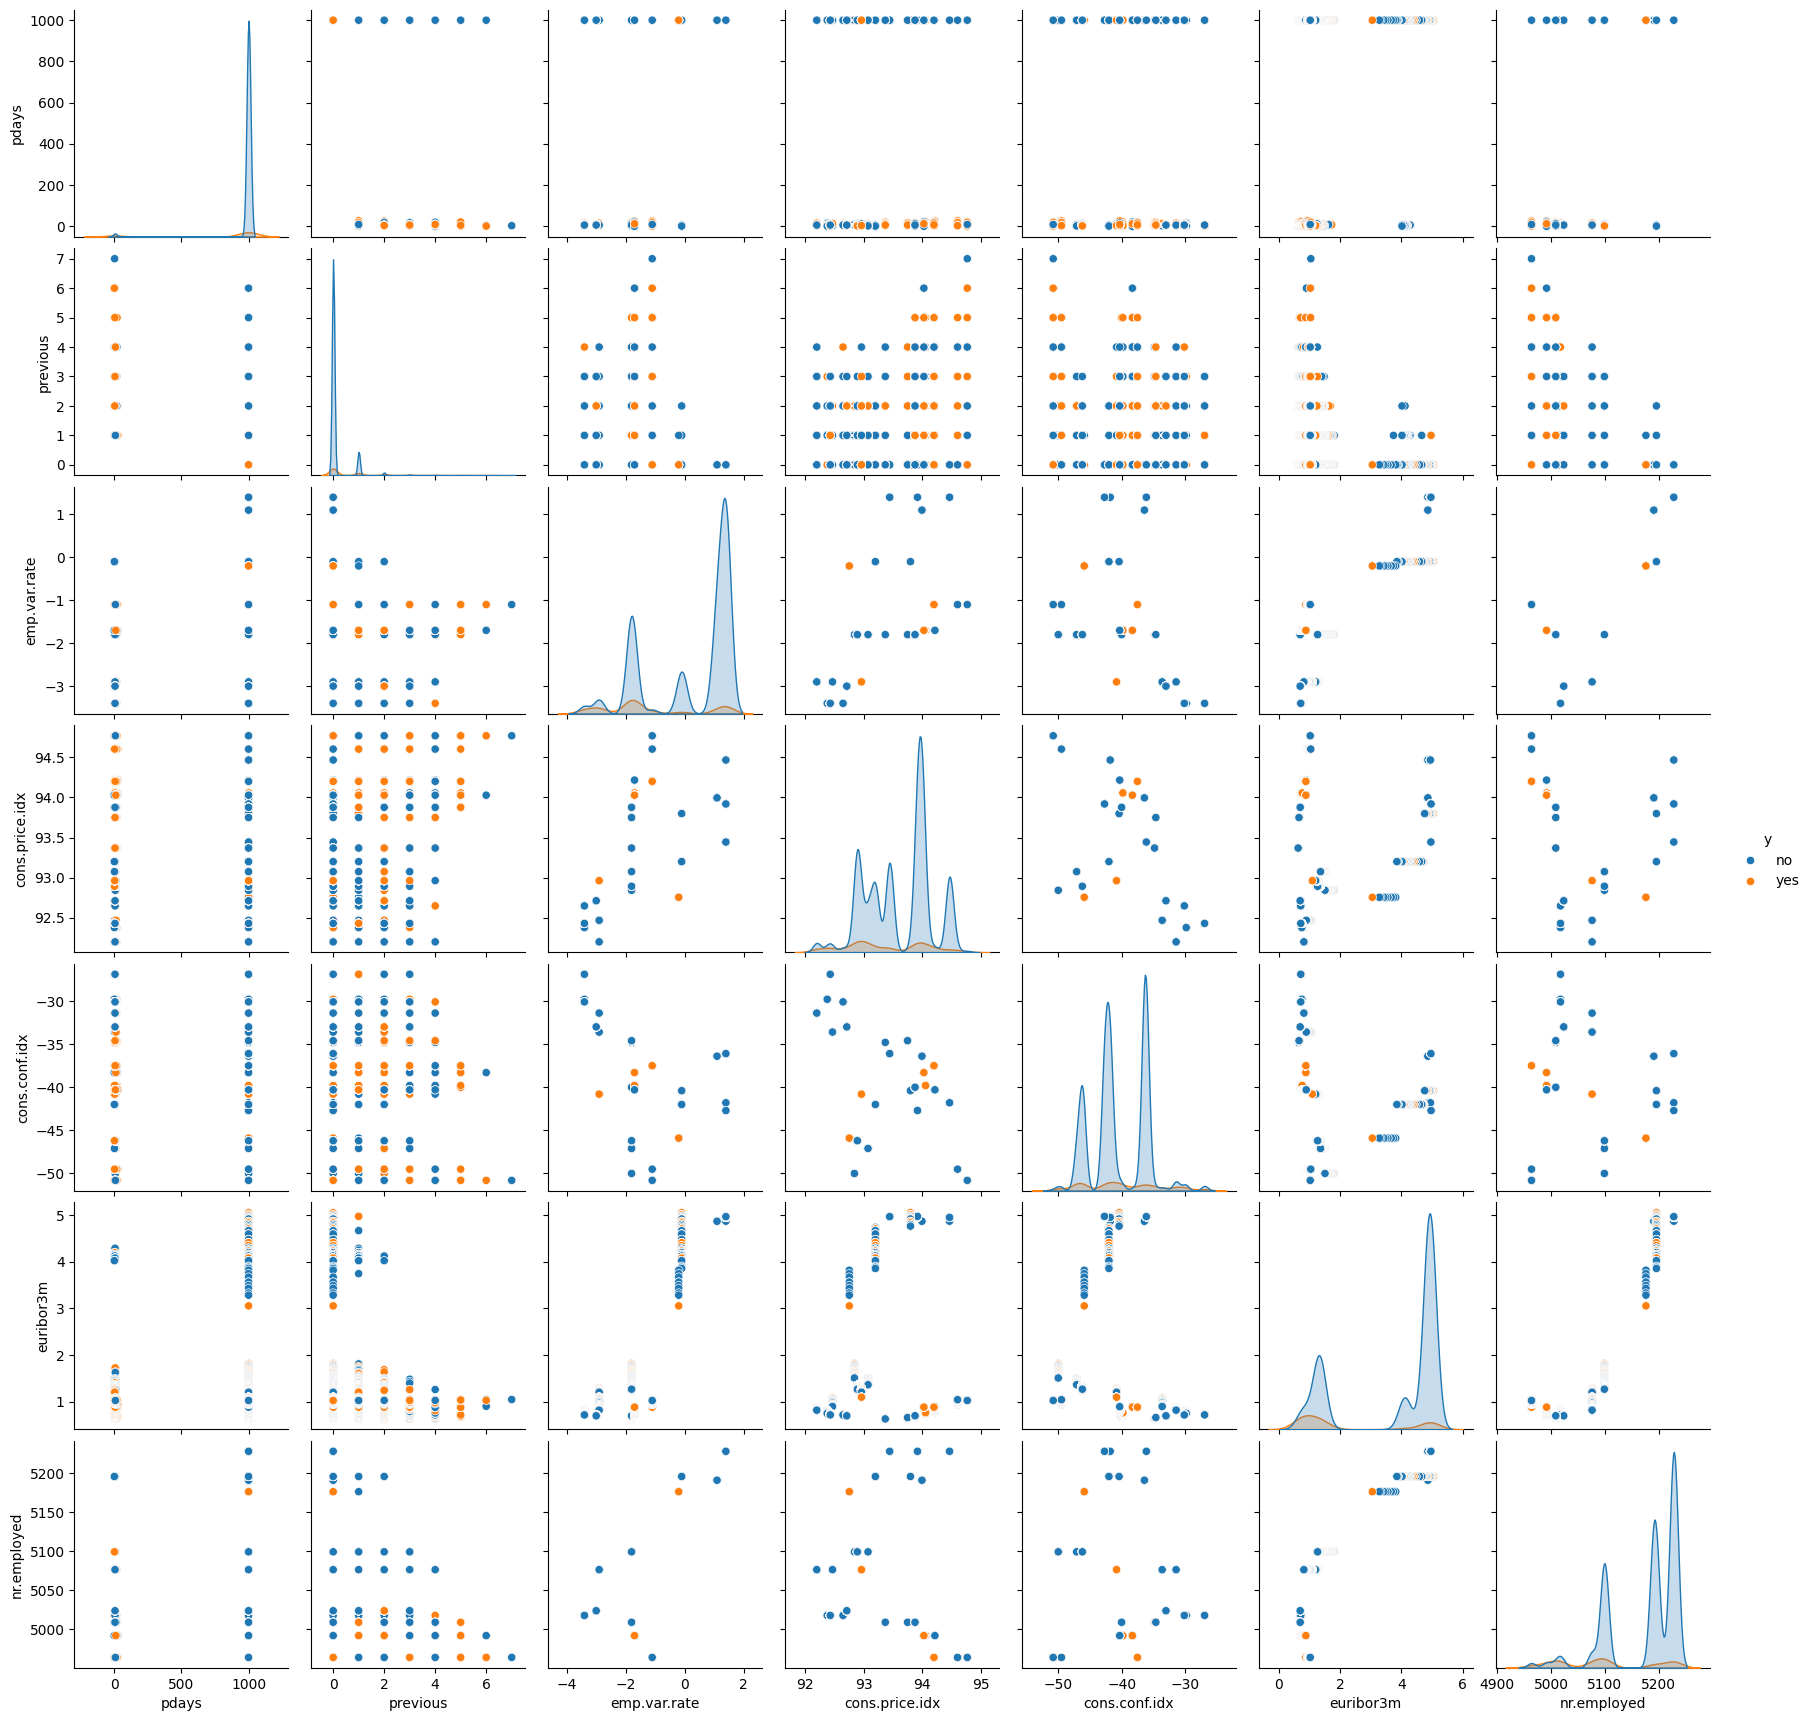

In [ ]:
correlaciones = ['pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
sns.pairplot(data[correlaciones], hue='y')

***

***